In [1]:
%matplotlib widget
%load_ext autoreload
%autoreload 2

from src.folder_handler import *
from src.cort_processor import *
from src.tdt_support import *
from src.plotter import *
from src.decoders import *
import pickle

# load data
data should be a single folder. Inside there should be a 'angles' (with angles), 'pose-3d', and 'tdt' folders named exactly that

In [3]:
session512 = CortProcessor('/home/grant/oobootoo/rat-fes/data/annie5-12') #insert name of your folder here

read from t=0s to t=186.82s
read from t=0s to t=164.93s


# process data
here, we crop our data, turn our raw data into rates, and we resample our angles to be same times as binned spikes

In [4]:
rates, kins = session512.process()

In [15]:
session512.data.keys()

dict_keys(['bodyparts', 'angle_names', 'rates', 'coords', 'angles'])

In [6]:
session512.data['rates'][0]

(2962, 32)

In [12]:
session512.data['angles'][0].shape

(2962, 7)

In [18]:
x = session512.data['rates']
y = session512.data['angles']

In [9]:
x_format, y_format = format_data(x, y)

In [10]:
x_format.shape

(2952, 320)

In [11]:
y_format.shape

(2952, 7)

In [19]:
x_format_all, y_format_all = session512.stitch_and_format(x, y)

In [20]:
x_format_all.shape

(5844, 320)

# alternative way to load data: using pickles (and process_cort.py in scripts)

in order to process data using command line, navigate to /scripts, and run 'python3 process_cort.py "path_to_folder"'

In [2]:
with open('/home/diya/Documents/rat-fes/data/pickles/rat-annie_5-12_session.pkl', 'rb') as inp:
    session512 = pickle.load(inp)

In [13]:
session512.data['angles'][0].shape

(2962, 7)

# other pipeline processing, like getting toe height

In [14]:
toe_height = session512.process_toe_height()

In [20]:
angles = session512.data['angles']

In [21]:
toe_height = session512.data['toe_height']

In [ ]:
new_angle = []
for i, angle in enumerate(angles):
    new_angle.append(hstack((angle, to

In [16]:
session512.data['rates']

[array([[ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ..., 20., 20.,  0.],
        [ 0., 20., 20., ..., 20., 20., 20.],
        ...,
        [60.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ..., 20., 20.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.]]),
 array([[180., 400., 300., ..., 340., 180., 340.],
        [180., 320., 260., ..., 260., 180., 260.],
        [160., 280., 220., ..., 300., 180., 280.],
        ...,
        [  0.,   0.,   0., ...,  20.,  40.,  40.],
        [ 40.,   0.,   0., ...,   0.,   0.,   0.],
        [ 40.,   0.,  20., ...,  20.,   0.,  20.]]),
 array([[20.,  0., 40., ..., 40., 40., 20.],
        [ 0.,  0., 20., ...,  0., 20.,  0.],
        [20., 60.,  0., ..., 20.,  0., 20.],
        ...,
        [ 0.,  0.,  0., ...,  0., 20.,  0.],
        [ 0.,  0.,  0., ...,  0., 60.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.]]),
 array([[20., 20., 20., ..., 20., 20., 40.],
        [ 0.,  0., 20., ...,  0.,  0.,  0.],
        [ 0., 20., 

# and now some decoding

## angles

In [24]:
angles = session512.data['angles']

In [43]:
session512.decode_angles?

Signature: session512.decode_angles(X=None, Y=None)
Docstring:
takes list of rates, angles, then using a wiener filter to decode. 
if no parameters are passed, uses data['rates'] and data['angles']
File:      ~/Documents/rat-fes/src/cort_processor.py
Type:      method


In [17]:
h_angles, vaf_angles, best_x_angles, best_y_angles = session512.decode_angles(Y=angle_list)

In [42]:
h_angles.shape

(321, 7)

In [ ]:
test_wiener_filter(best_x_angles, 

In [18]:
average_vaf_angle = np.average(vaf_angles, 1)
print(average_vaf_angle)

[0.3171648  0.46291697 0.15983288 0.42454539 0.37330029 0.07151469
 0.29051661]


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
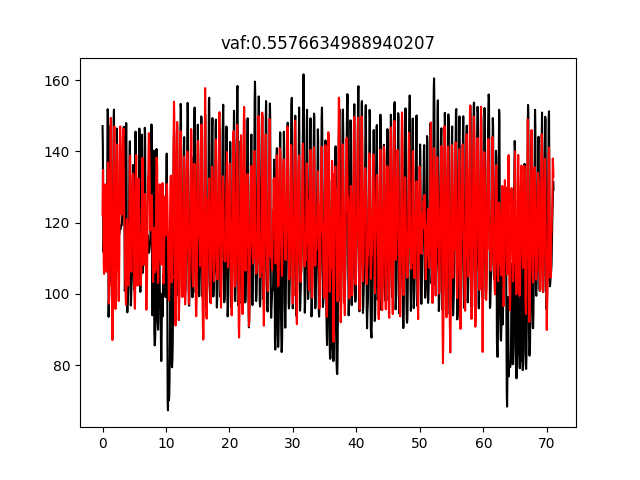

In [19]:
plot_wiener_filter_predic(best_x_angles, best_y_angles[:,3], h_angles[:,3])

## toe_height

In [32]:
h_toe, vaf_toe, best_x_toe, best_y_toe = session512.decode_toe_height()

[0.22420311 0.23187762 0.3987968  0.37335861 0.46173655 0.39471041
 0.4846862  0.44111594 0.49718632 0.52955933]


In [33]:
average_toe_vaf = np.average(vaf_toe)
print(average_toe_vaf)

0.40372309059923983


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
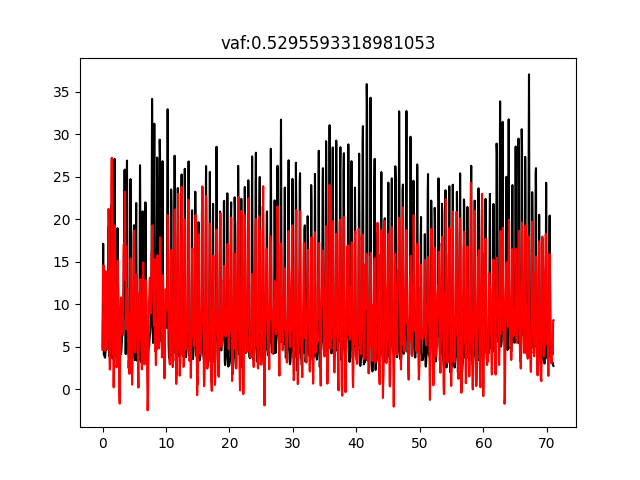

In [34]:
plot_wiener_filter_predic(best_x_toe, best_y_toe, h_toe)

# or dividing into gaits, then plotting sorted raster.

In [35]:
session512.get_gait_indices?

Signature: session512.get_gait_indices(Y=None)
Docstring:
#TODO
TODO
File:      ~/Documents/rat-fes/src/cort_processor.py
Type:      method


In [36]:
gait_indices, avg_gait_samples = session512.get_gait_indices()

In [37]:
X_gait, Y_gait = session512.divide_into_gaits()

In [38]:
len(X_gait)

4

In [ ]:
#proc_rates, proc_angles = session512.remove_bad_gaits()

In [39]:
df = session512.neuron_tuning()

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
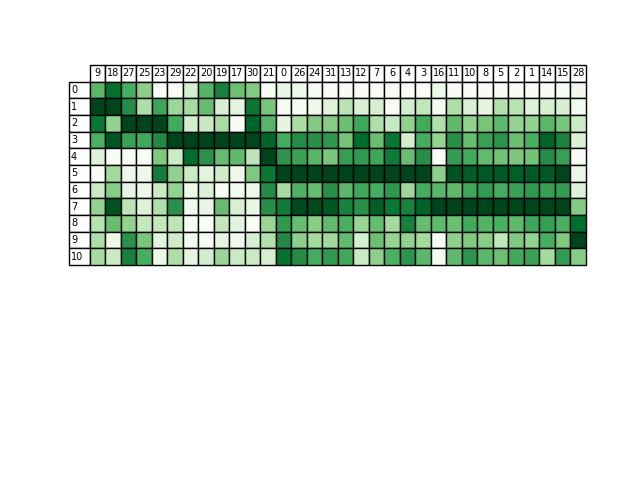

In [40]:
plot_raster(df)